In [1]:
#Linear regression

In [3]:
#Importing libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
#Importing the file
df=pd.read_csv("hou_all.csv")
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
Medv       float64
dtype: object

In [7]:
df.shape

(506, 14)

In [8]:
#To check for null values:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Medv       0
dtype: int64

In [9]:
#To remove outliers:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
floor=df.quantile(0.99)
floor

CRIM        41.37033
ZN          90.00000
INDUS       25.65000
CHAS         1.00000
NOX          0.87100
RM           8.33500
AGE        100.00000
DIS          9.22277
RAD         24.00000
TAX        666.00000
PTRATIO     21.20000
B          396.90000
LSTAT       33.91850
Medv        50.00000
Name: 0.99, dtype: float64

In [12]:
ceil=df.quantile(0.01)
ceil

CRIM         0.01361
ZN           0.00000
INDUS        1.25350
CHAS         0.00000
NOX          0.39800
RM           4.52445
AGE          6.61000
DIS          1.20654
RAD          1.00000
TAX        188.00000
PTRATIO     13.00000
B            6.73000
LSTAT        2.88300
Medv         7.01000
Name: 0.01, dtype: float64

In [13]:
df['target']=df['Medv']
df_new=df.drop('Medv',axis=1)
df=df_new

In [15]:
X=df.drop(['target'],axis=1)
y=df['target']

In [18]:
#Outlier treatment using capping:
def outlier_capping(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [19]:
X=X.apply(lambda x: outlier_capping(x))
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.375175,11.304348,11.118875,0.069170,0.554770,6.287106,68.584506,3.778529,9.549407,407.794466,18.454743,356.715751,12.642073
std,6.908970,23.112644,6.809112,0.253994,0.115773,0.678876,28.127163,2.052652,8.707259,167.791388,2.154109,91.133441,7.074084
min,0.013610,0.000000,1.253500,0.000000,0.398000,4.524450,6.610000,1.206540,1.000000,188.000000,13.000000,6.730000,2.883000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,41.370330,90.000000,25.650000,1.000000,0.871000,8.335000,100.000000,9.222770,24.000000,666.000000,21.200000,396.900000,33.918500


Text(0, 0.5, 'Number of houses')

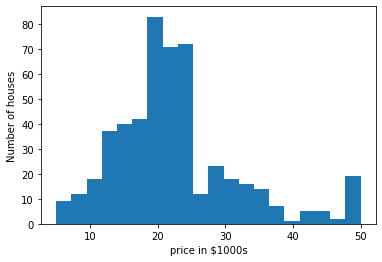

In [21]:
#plotting the output variable:
plt.hist(df.target,bins=20)
plt.xlabel('price in $1000s')
plt.ylabel('Number of houses')

<ipython-input-23-8e32aefca8e8>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()
/Users/harshithachandrareddy/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:318: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)
<ipython-input-23-8e32aefca8e8>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the

<Figure size 432x288 with 0 Axes>

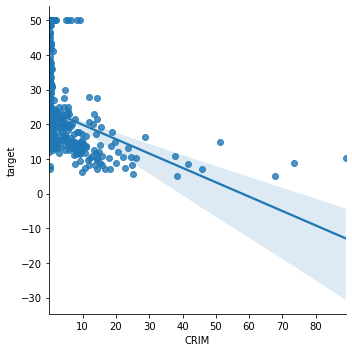

<Figure size 432x288 with 0 Axes>

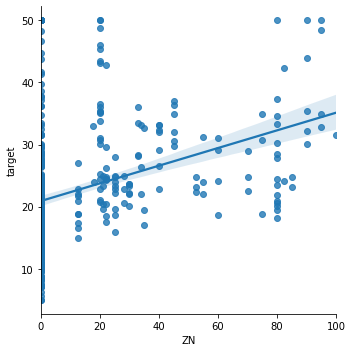

<Figure size 432x288 with 0 Axes>

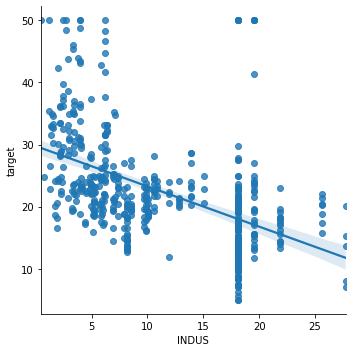

<Figure size 432x288 with 0 Axes>

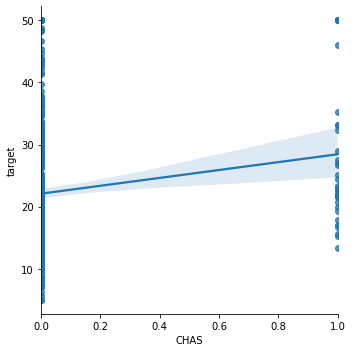

<Figure size 432x288 with 0 Axes>

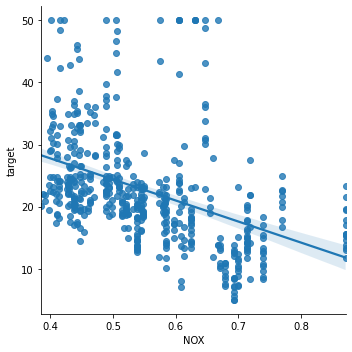

<Figure size 432x288 with 0 Axes>

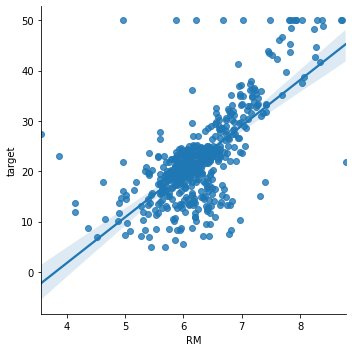

<Figure size 432x288 with 0 Axes>

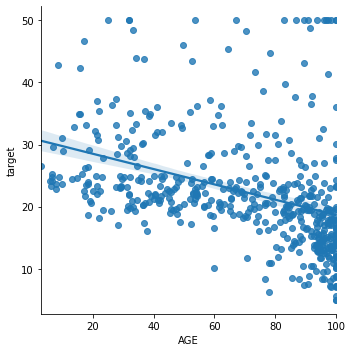

<Figure size 432x288 with 0 Axes>

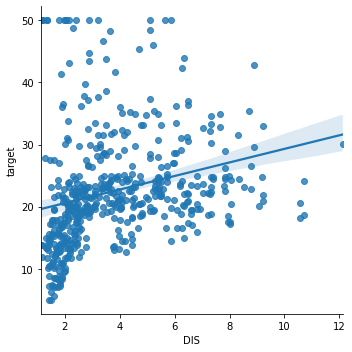

<Figure size 432x288 with 0 Axes>

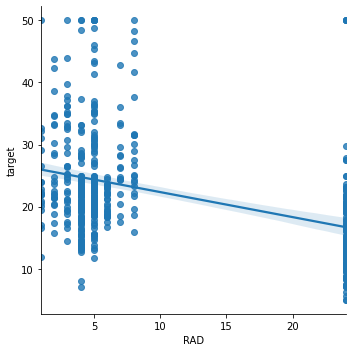

<Figure size 432x288 with 0 Axes>

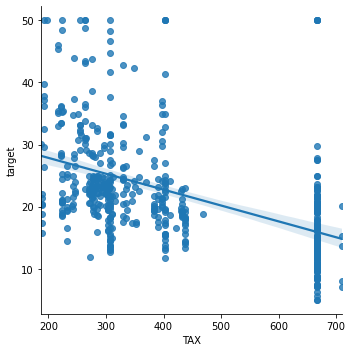

<Figure size 432x288 with 0 Axes>

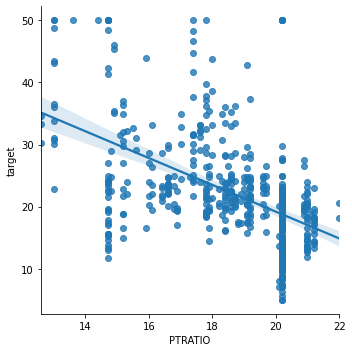

<Figure size 432x288 with 0 Axes>

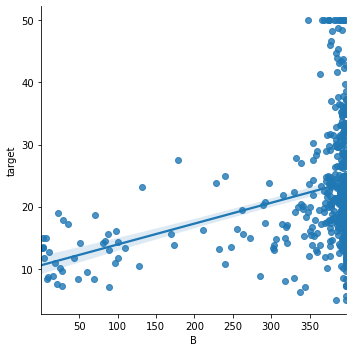

<Figure size 432x288 with 0 Axes>

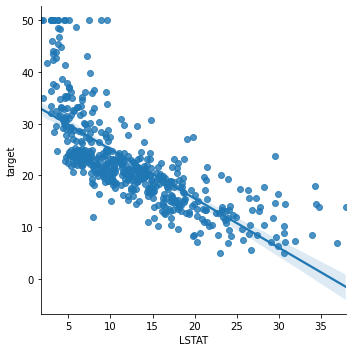

In [23]:
#To see the Correlation between the variables:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
for col in (X.columns):
    plt.figure()
    sns.lmplot(x=col, y="target",data=df )
plt.show()


In [26]:
#Lets implement linear regression using stats model
import statsmodels.api as sm
mod=sm.OLS(y,X)
res=mod.fit()

In [27]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              928.7
Date:                Thu, 22 Oct 2020   Prob (F-statistic):                        0.00
Time:                        19:52:36   Log-Likelihood:                         -1513.8
No. Observations:                 506   AIC:                                      3054.
Df Residuals:                     493   BIC:                                      3109.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1030      0.049     -2.112      0.035      -0.199      -0.007
ZN             0.0426      0.014      2.992      0.003       0.015       0.071
INDUS          0.0067      0.063      0.106      0.916      -0.118       0.131
CHAS           2.8739      0.887      3.242      0.001       1.132       4.616
NOX           -4.2514      3.336     -1.274      0.203     -10.806       2.303
RM             6.2903      0.314     20.039      0.000       5.674       6.907
AGE           -0.0107      0.014     -0.784      0.433      -0.038       0.016
DIS           -1.0211      0.199     -5.134      0.000      -1.412      -0.630
RAD            0.1767      0.069      2.575      0.010       0.042       0.312
TAX           -0.0097      0.004     -2.458      0.014      -0.017      -0.002
PTRATIO       -0.4567      0.109     -4.197      0.000      -0.671      -0.243
B              0.0146      0.003      5.501      0.000       0.009       0.020
LSTAT         -0.3996      0.052     -7.749      0.000      -0.501      -0.298
==============================================================================
Omnibus:                      209.412   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1511.570
Skew:                           1.635   Prob(JB):                         0.00
Kurtosis:                      10.811   Cond. No.                     8.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Since the alpha is 0.05 we drop the variables which are not statistically significant
#i.e variables with p>\T| <0.05 will be selected

In [28]:
sig_vars=['ZN','CHAS','RM','DIS','RAD','TAX','PTRATIO','B','LSTAT']
x_vars=X[sig_vars]

In [31]:
#Importing linear regression model from Sk learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_vars, y, test_size=0.3, random_state=42)

In [32]:
X_test.shape

(152, 9)

In [33]:
X_train.shape

(354, 9)

In [34]:
#model implementation:
linreg=LinearRegression()
model=linreg.fit(X_train,Y_train)

In [36]:
model.score(X_test,Y_test)

0.7054334171449067

In [37]:
model.score(X_train,Y_train)

0.7346112409345149

In [38]:
#The intercept of the linear model is:
print(' The estimated model intercept is %.2f ' %model.intercept_)

 The estimated model intercept is 16.88 


In [40]:
coeff_df=pd.DataFrame(x_vars.columns)
coeff_df.columns=['features']
coeff_df["Coefficient Estimate"] = pd.Series(model.coef_)
coeff_df

,features,Coefficient Estimate
0,ZN,0.033982
1,CHAS,3.128566
2,RM,4.461580
3,DIS,-0.908650
4,RAD,0.140685
5,TAX,-0.010391
6,PTRATIO,-0.728115
7,B,0.012600
8,LSTAT,-0.614327


In [43]:
#Predictions on training and testing sets:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
Pred_all=model.predict(x_vars)

In [45]:
print("Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2))
    
print("Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2))

print("Fit a model and calculate MSE with X and Y: %.2f"  %np.mean((y - Pred_all) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 23.33
Fit a model X_train, and calculate MSE with X_test and Y_test: 21.95
Fit a model and calculate MSE with X and Y: 22.91


Text(0.5, 1.0, 'Residual Plots')

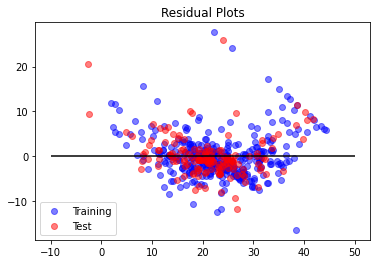

In [46]:
# Scatter plot the training data
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

In [48]:
pred_price = model.predict(x_vars)

In [49]:
df['pred_price']=pd.DataFrame(pred_price)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,pred_price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.974075
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.204238
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,31.700810
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,30.256924
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,29.482061


In [50]:
df['Rank_Pred']=pd.qcut(df['pred_price'].rank(method='first').values,5,duplicates='drop').codes+1
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,pred_price,Rank_Pred
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.974075,5
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.204238,4
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,31.700810,5
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,30.256924,5
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,29.482061,5


In [51]:
df['Rank_Actuals']=pd.qcut(df['target'].rank(method='first').values,5,duplicates='drop').codes+1
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target,pred_price,Rank_Pred,Rank_Actuals
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.974075,5,4
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.204238,4,3
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,31.700810,5,5
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,30.256924,5,5
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,29.482061,5,5
